In [1]:
from quspin.operators import hamiltonian# operators
from quspin.basis import boson_basis_1d # Hilbert space boson basis
from quspin.basis import tensor_basis,spinless_fermion_basis_1d # Hilbert spaces
from quspin.basis import spin_basis_1d # Hilbert space spin basis
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function, division
from quspin.tools.measurements import obs_vs_time # t_dep measurements
from quspin.tools.Floquet import Floquet_t_vec

### Build basis and Hamiltonian

In [2]:
sites=2
###### parameters
L_spin = 1
L_modes = sites # system size
total_boson_number = sites
cutoff = 3 #sites+2
h = 1 # field strength
t = 1
###### create the basis
# building the two bases to tensor together
basis_spin = spin_basis_1d(L=L_spin)
basis_boson=boson_basis_1d(L=L_modes,sps=cutoff,Nb=total_boson_number)
basis = tensor_basis(basis_spin,basis_boson)
# print(basis)

##### create model
hop=[[-t,i,i,i+1] for i in range(L_modes-1)]
field = [[-h,i] for i in range(L_spin)]
static=[["z|+-",hop],["z|-+",hop],["x|",field]]
###### setting up operators
# set up hamiltonian dictionary and observable (imbalance I)
no_checks = dict(check_pcon=False,check_symm=False,check_herm=False)
H = hamiltonian(static,[],basis=basis,**no_checks)
# E, _ = H.eigsh(k=2)

### define initial state

In [3]:
# ##### define initial state #####
# #Spin - find index of spin state |01>
# ispin = basis_spin.index("01")
# #Boson - find index of Fock state |20>
# iboson = basis_boson.index("02")
# # Ns is the size of the Hilbert space
# psispin = np.zeros(basis_spin.Ns,dtype=np.float64) # for 2 bosons in 2 modes Ns=3 ("20","11","02")
# psispin[ispin] = 1.0
# psiboson = np.zeros(basis_boson.Ns,dtype=np.float64)
# psiboson[iboson] = 1.0
# psi=np.kron(psispin,psiboson)

In [4]:
##### define initial state #####
psispin=(1/np.sqrt(2))*np.array([1,1])
#Boson - find index of Fock state |20>
iboson = basis_boson.index("02")
# Ns is the size of the Hilbert space
psiboson = np.zeros(basis_boson.Ns,dtype=np.float64)
psiboson[iboson] = 1.0
psi=np.kron(psispin,psiboson)

##### Check state we just made

In [5]:
field = [[1.0,0]] #second index chooses which spin or mode to check (ie. 0 is the 1st mode, 1 is the second and same for spins)
static=[["z|",field]] #z| checks magnetization of spins, |n checks boson number in modes
no_checks = dict(check_pcon=False,check_symm=False,check_herm=False)
H_check = hamiltonian(static,[],basis=basis,**no_checks)
print(np.dot(psi.conj().T,H_check.dot(psi)))

0j


### Time evolve

In [6]:
t=np.linspace(0,2,20)
print(t)

[0.         0.10526316 0.21052632 0.31578947 0.42105263 0.52631579
 0.63157895 0.73684211 0.84210526 0.94736842 1.05263158 1.15789474
 1.26315789 1.36842105 1.47368421 1.57894737 1.68421053 1.78947368
 1.89473684 2.        ]


In [7]:
psi_t=H.evolve(psi,t[0],t,iterate=True,rtol=1E-9,atol=1E-9)

In [8]:
obs_args={"basis":basis,"check_herm":False,"check_symm":False}
n=hamiltonian([["|n", [[1.0,1]] ]],[],dtype=np.float64,**obs_args)
Obs_t = obs_vs_time(psi_t,t,{"n":n})
O_n = Obs_t["n"]

/tmp/ipykernel_25784/4003040525.py:2: UserWarning: Test for particle conservation not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_pcon=False in hamiltonian
  n=hamiltonian([["|n", [[1.0,1]] ]],[],dtype=np.float64,**obs_args)


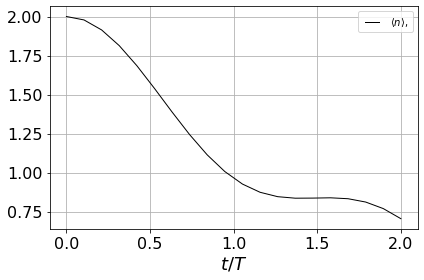

In [9]:
##### plot results #####
import matplotlib.pyplot as plt
import pylab
str_n = "$\\langle n\\rangle,$"
fig = plt.figure()
plt.plot(t,np.real(O_n),"k",linewidth=1,label=str_n)
plt.xlabel("$t/T$",fontsize=18)
# plt.ylim([-1.1,1.4])
plt.legend(loc="upper right",ncol=5,columnspacing=0.6,numpoints=4)
plt.tick_params(labelsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig('example3.pdf', bbox_inches='tight')
plt.show()
# plt.close()